In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import sys
sys.path.append('../')
from package_global_functions import *

extSSDpath = getExternalSSDpath()
if os.path.exists(extSSDpath):
    path = extSSDpath + getProjectFoldername() + '/sim_some_params_rework/results'
else:
    path = '/results'

In [18]:
Nsites = 2
N = 100
pi1, pi2 = 0.0, 0.0
q1, q2 = 7.0, 10.0

df = pd.read_csv(path + f'/results_sim_Nsites_{Nsites}.csv')
df = df.query('pi1 == @pi1 & pi2 == @pi2 & q1 == @q1 & q2 == @q2 & N == @N')

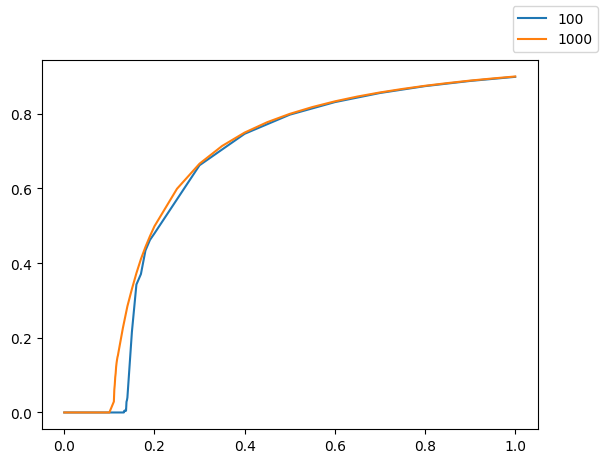

In [20]:
fig, ax = plt.subplots()
for N in [100, 1000]:
    df = pd.read_csv(path + f'/results_sim_Nsites_{Nsites}.csv')
    df = df.query('pi1 == @pi1 & pi2 == @pi2 & q1 == @q1 & q2 == @q2 & N == @N')
    ax.plot(df['l'], df['f2'], label=f'{N}')
fig.legend()

In [17]:
len(str(0.001).split('.')[-1])

3

In [15]:
str(0.01)

'0.01'